<a href="https://colab.research.google.com/github/DattaIn/idatta.github.io/blob/master/CDS_B1_M0_SNB_Practice_04_MatplotlibandSeaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Practice Notebook 5: Introduction to Matplotlib and Seaborn

## Learning Objectives

At the end of the experiment, you will be able to :

* use matplotlib to create scatter, line and bar plots
* customize the labels, colors and look of your matplotlib plot
* create figures with multiple plots

#### Exercise 1: Import necessary packages from matplotib  for visualization

In [13]:
import matplotlib.pyplot as plt

#### Exercise 2: Import seaborn under a name sb

In [14]:
import seaborn as sns

###### Data 1

In [15]:
import numpy as np
import pandas as pd
X = np.arange(0,100)
Y = X * 2
X = X ** 3

#### Exercise 3

- Use above data
- Create a figure object called fig using plt.figure()
- Use add_axes to add an axis to the figure canvas at [0,0,1,1].
- Call this new axis ax.plot (X,Y) on that axes and set labels and title for the graph

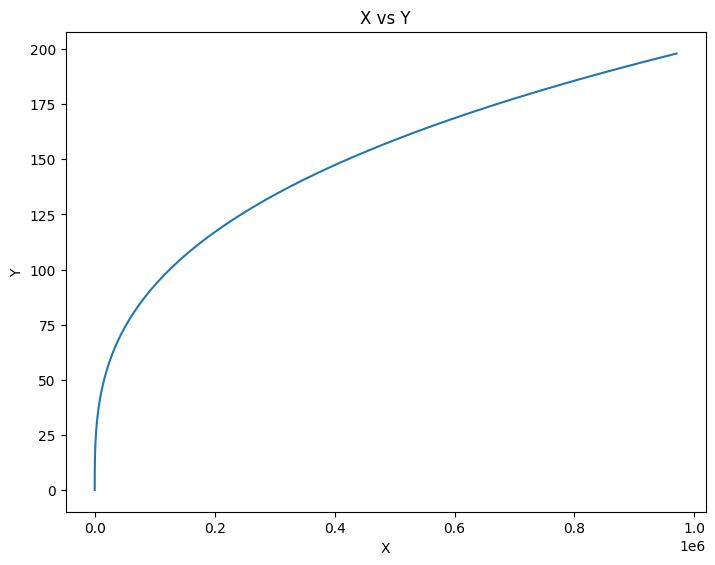

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('X vs Y')
ax.plot(X,Y)

##### Exercise 4

- Create a Python dictionary of 4 of your favourite foods, wherein,
    - the keys of the dictionary should be the food item and the values should be their prices
- Create a Vertical bar graph where the x-axis is 'Food Item' and the y-axis is 'Price'
- Add a title, xlabel and ylabel to the plot

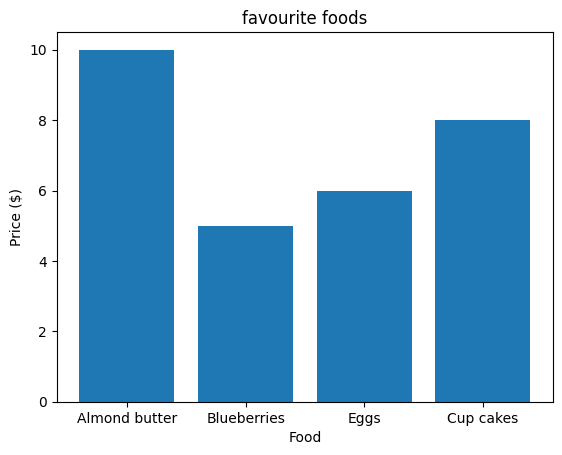

In [17]:
favourite_food_prices = {"Almond butter": 10,
                         "Blueberries": 5,
                         "Eggs": 6,
                         "Cup cakes": 8}

fig, ax = plt.subplots()
ax.bar(favourite_food_prices.keys(), favourite_food_prices.values())

# Add a title, xlabel and ylabel to the plot
ax.set(title="favourite foods",
       xlabel="Food",
       ylabel="Price ($)")
plt.show()

#### Exercise 5: Using the above data, Create a horizontal bar graph where the x-axis is the keys of the dictionary and the y-axis is the values of the dictionary

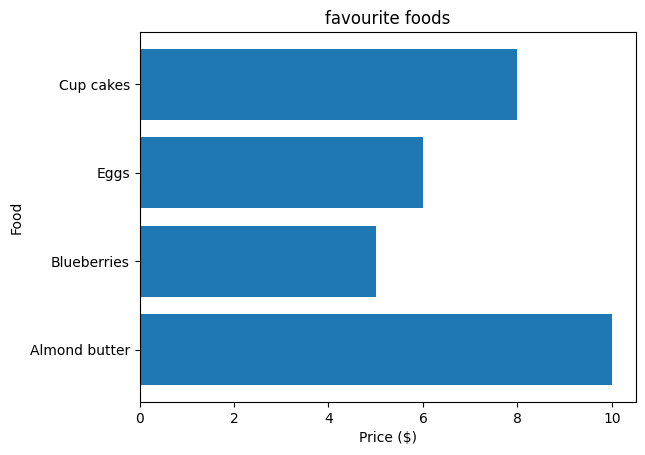

In [18]:
fig, ax = plt.subplots()
ax.barh(list(favourite_food_prices.keys()),
        list(favourite_food_prices.values()))
ax.set(title="favourite foods",
       xlabel="Price ($)",
       ylabel="Food")
plt.show()

#### Exercise 6

- Create a NumPy array of 1000 normally distributed random numbers using NumPy and save it to X
- Create a histogram plot of X

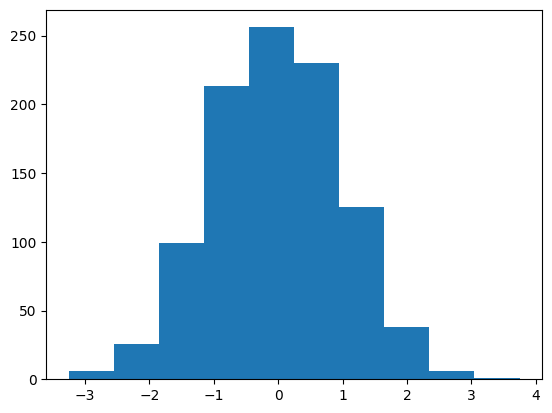

In [19]:
X = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(X);

###### Data 2

In [20]:
x = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]

y = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]

#### Exercise 7: Using the above data, Plot the scatter plot.

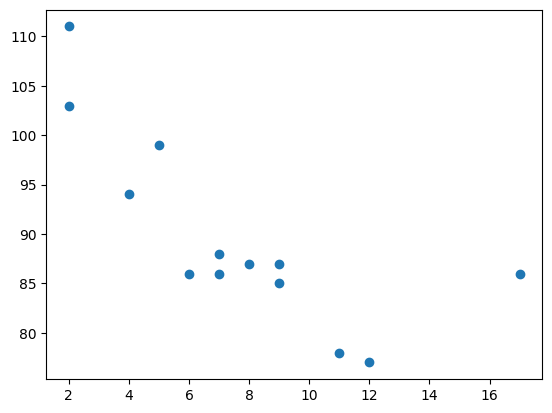

In [21]:
plt.scatter(x, y)
plt.show()

###### Data 3

In [22]:
a = np.array([0, 1, 2, 3, 4, 5])

xx = np.linspace(-0.75, 1., 100)

#### Exercise 8: Using the above data, Plot the scatter, step, bar plots

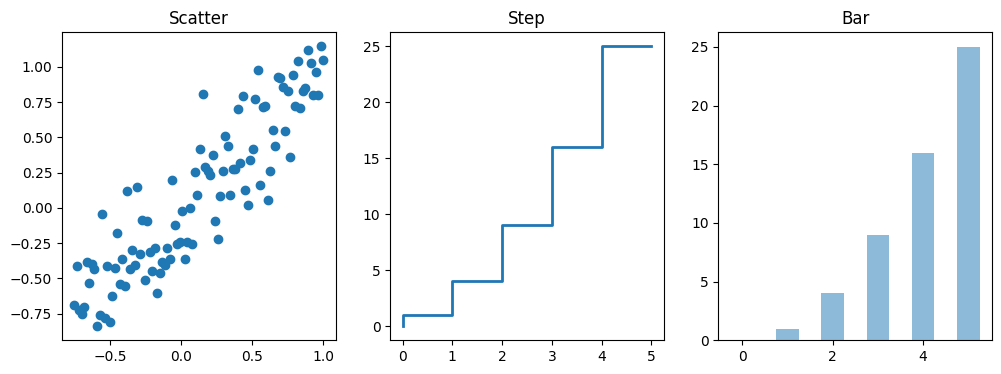

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

axes[0].scatter(xx, xx + 0.25 * np.random.randn(len(xx)))
axes[0].set_title("Scatter")

axes[1].step(a, a ** 2, lw=2)
axes[1].set_title("Step")

axes[2].bar(a, a ** 2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("Bar")
plt.show()

##### Data 4

Download dataset from [here](https://cdn.iisc.talentsprint.com/CDS/Datasets/final.csv)

#### Exercise 9: Using above data , perform the following:

    a) Create a Histogram of life expectancy in the year 2007 across all 142 countries in the given dataset
    b) Create a Bar plot showing the per-capita GDP for all the countries in Oceania during 2007
    c) Plot the Pie chart that displays proportions of all countries contained in each of the 5 continents
    d) Create a Line plot showing the life expectancy for Spain and Portugal across all the years in the dataset.



In [ ]:
x=GET('datascience/module-0/csv-files/final.csv', authenticate(Sys.getenv("GITHUB_PAT1"), ""))
content(x, type="text/csv")

In [24]:
# DOWNLOAD final.csv BEFORE EXECUTING THIS CELL

import pandas as pd
df = pd.read_csv("final.csv", sep="\t")
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333.0,779.445314
1,Afghanistan,Asia,1957,30.332,9240934.0,820.853030
2,Afghanistan,Asia,1962,31.997,10267083.0,853.100710
3,Afghanistan,Asia,1967,34.020,11537966.0,836.197138
4,Afghanistan,Asia,1972,36.088,13079460.0,739.981106


In [25]:
df.country.nunique()

142

In [26]:
df2k17 = df[df.year == 2007]

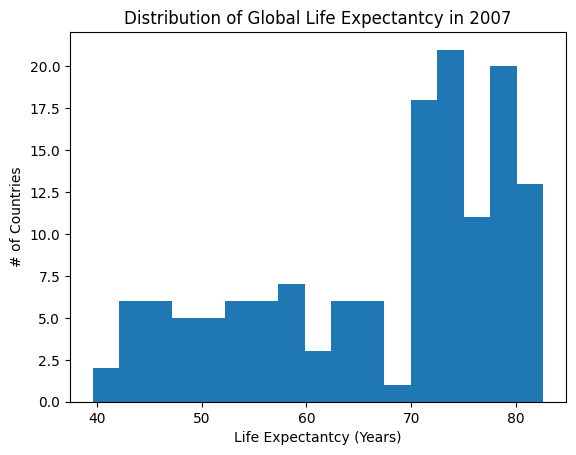

In [27]:
# a

plt.hist(df2k17['lifeExp'], bins=17);
plt.title('Distribution of Global Life Expectantcy in 2007')
plt.xlabel('Life Expectantcy (Years)')
plt.ylabel('# of Countries');

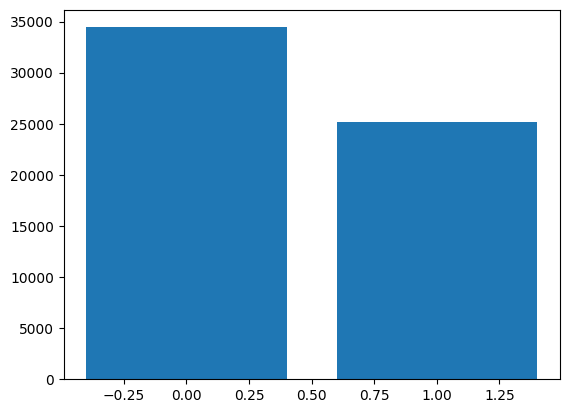

In [28]:
# b

df1 = df2k17[df2k17['continent']=='Oceania']
plt.bar(range(len(df1)), df1['gdpPercap'])
plt.show()

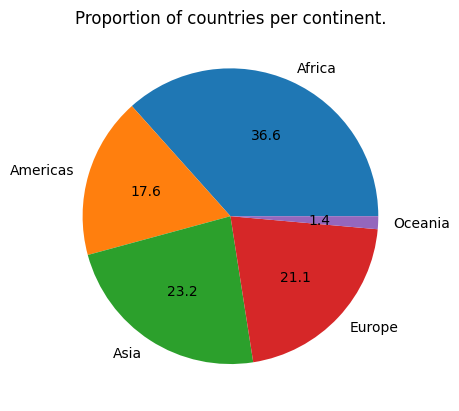

In [29]:
# c
countries = df[['country', 'continent']]
country_counts = countries.groupby('continent', as_index=False)['country'].count()
country_counts.columns = ['continent', 'n_countries']
continents = country_counts['continent']
n_continents = len(country_counts)
plt.pie(country_counts['n_countries'], labels=continents, autopct='%.01f')
plt.title('Proportion of countries per continent.');

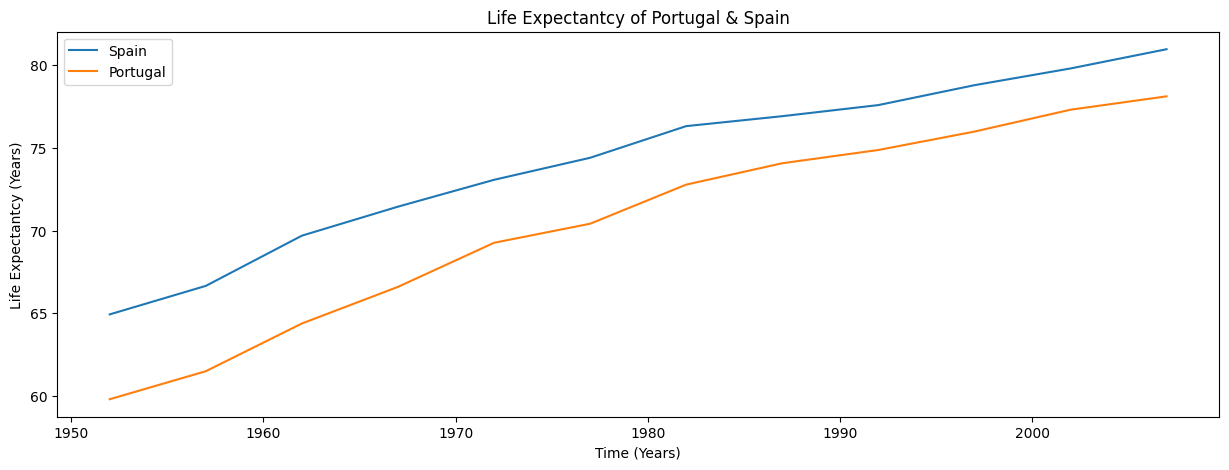

In [30]:
# d
portugal = df[df['country'] == 'Portugal']
spain = df[df['country'] == 'Spain']
plt.figure(figsize=(15,5))
plt.plot(spain['year'], spain['lifeExp'], label='Spain')
plt.plot(portugal['year'], portugal['lifeExp'], label='Portugal')
plt.title('Life Expectantcy of Portugal & Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Life Expectantcy (Years)')
plt.legend();